In [41]:
import pandas as pd
import numpy as np

df = pd.read_csv('player_data_final.csv')
# df = pd.read_csv('player_market_value_data.csv')
df.head()

,player_id,market_value_in_eur,position,foot,height_in_cm,age,total_goals,total_assists,total_minutes_played
0,10,1000000.0,4,0,184.0,38,48.0,25.0,8808.0
1,26,750000.0,1,1,190.0,38,0.0,0.0,13508.0
2,65,1000000.0,4,3,183.0,35,38.0,13.0,8788.0
3,77,200000.0,2,3,183.0,34,0.0,0.0,307.0
4,80,100000.0,1,0,194.0,36,0.0,0.0,1080.0


In [42]:
# Handle categorical variables using one-hot encoding
df_processed = pd.get_dummies(df, columns=['position', 'foot']).astype(int)

# Display the first few rows of the processed dataframe
df_processed.head()

,player_id,market_value_in_eur,height_in_cm,age,total_goals,total_assists,total_minutes_played,position_0,position_1,position_2,position_3,position_4,foot_0,foot_1,foot_2,foot_3
0,10,1000000,184,38,48,25,8808,0,0,0,0,1,1,0,0,0
1,26,750000,190,38,0,0,13508,0,1,0,0,0,0,1,0,0
2,65,1000000,183,35,38,13,8788,0,0,0,0,1,0,0,0,1
3,77,200000,183,34,0,0,307,0,0,1,0,0,0,0,0,1
4,80,100000,194,36,0,0,1080,0,1,0,0,0,1,0,0,0


In [43]:
X = df_processed.drop(['player_id', 'market_value_in_eur', 'foot_2', 'foot_3', 'position_0'], axis=1)
y = df_processed['market_value_in_eur']

In [44]:
# Add Bias

X_bias = pd.concat([pd.Series(1, index=X.index, name='bias'), X], axis=1)
X_bias.head()


,bias,height_in_cm,age,total_goals,total_assists,total_minutes_played,position_1,position_2,position_3,position_4,foot_0,foot_1
0,1,184,38,48,25,8808,0,0,0,1,1,0
1,1,190,38,0,0,13508,1,0,0,0,0,1
2,1,183,35,38,13,8788,0,0,0,1,0,0
3,1,183,34,0,0,307,0,1,0,0,0,0
4,1,194,36,0,0,1080,1,0,0,0,1,0


In [45]:
# Split data

indices = np.arange(X_bias.shape[0])
np.random.shuffle(indices)

# Step 2: Calculate split index (e.g., 80% train)

split_ratio = 0.8
split_index = int(len(indices) * split_ratio)

# Step 3: Split indices into train and test
train_indices = indices[:split_index]
test_indices = indices[split_index:]

# Step 4: Create train/test sets using the indices
X_train = X_bias.iloc[train_indices]
y_train = y.iloc[train_indices]
X_test = X_bias.iloc[test_indices]
y_test = y.iloc[test_indices]

In [46]:
y_train.shape 

(24862,)

In [47]:
# Mean and Standered Deviation
# Normalise the Data

# numerical_cols = ['height_in_cm', 'age', 'total_goals', 'total_assists', 'total_minutes_played']
# mean = X_train[numerical_cols].mean()
# std = X_train[numerical_cols].std()
# mean

cols_to_standardize = X_train.columns[1:6]

means = X_train[cols_to_standardize].mean()
stds = X_train[cols_to_standardize].std()

# --- 4. Apply scaling ---
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_to_standardize] = (X_train[cols_to_standardize] - means) / stds
X_test_scaled[cols_to_standardize] = (X_test[cols_to_standardize] - means) / stds

X_train_scaled
# mean = np.mean(X_train)
# std = np.std(X_train)

# # Standardizing data

# train_data_std = (X_train - mean) / std
# test_data_std = (X_test - mean) / std


,bias,height_in_cm,age,total_goals,total_assists,total_minutes_played,position_1,position_2,position_3,position_4,foot_0,foot_1
408,1,-1.214213,1.960352,0.302072,1.527269,2.000493,0,1,0,0,0,1
21287,1,1.261495,-0.404426,-0.148121,-0.111005,0.685384,0,1,0,0,1,0
4534,1,0.533346,1.172093,1.395397,1.623638,0.363286,0,0,0,1,1,0
22041,1,-1.068583,0.383833,-0.148121,-0.111005,-0.181130,0,0,1,0,1,0
8834,1,0.387716,0.383833,0.366385,0.081733,-0.067167,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12852,1,-1.505473,0.580898,-0.341060,-0.400113,-0.629726,0,0,1,0,1,0
6622,1,0.096456,-0.010296,-0.212434,-0.111005,-0.168266,0,0,1,0,1,0
3435,1,-0.486064,1.172093,-0.276747,-0.400113,0.454654,0,1,0,0,0,1
28915,1,0.242086,0.186769,-0.341060,-0.400113,-0.577115,0,0,1,0,1,0


In [48]:
# --- 1. Log transform ---
y_train_log = np.log1p(y_train)   # log(1 + y)
y_test_log = np.log1p(y_test)     # apply same transformation to test

# --- 2. Compute mean and std from TRAINING target ---
y_mean = y_train_log.mean()
y_std = y_train_log.std()

# --- 3. Scale ---
y_train_scaled = (y_train_log - y_mean) / y_std
y_test_scaled = (y_test_log - y_mean) / y_std



In [60]:

# --- 1. Prepare matrices ---
X = X_train_scaled.values.astype(float)
y = y_train_scaled.values.astype(float).reshape(-1, 1)


n_samples, n_features = X.shape

# --- 2. Initialize weights ---
np.random.seed(42)
w = np.random.randn(n_features, 1) * 0.01   # small random values

# --- 3. Set hyperparameters ---
alpha = 0.001      # learning rate
n_iter = 1000   # number of iterations

# --- 4. Gradient Descent Loop ---
losses = []

for i in range(n_iter):
    # Predictions
    y_pred = X.dot(w)
    
    # Compute error
    error = y_pred - y
    
    # Compute loss (MSE)
    loss = (error**2).mean()
    losses.append(loss)
    
    # Compute gradient
    grad = (2 / n_samples) * X.T.dot(error)
    
    # Update weights
    w -= alpha * grad
    
    # Optional: print every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss:.6f}")

# --- 5. Final weights ---
print("\nTraining completed!")
print("Final Loss:", losses[-1])


Iteration 0, Loss: 0.995704
Iteration 100, Loss: 0.889993
Iteration 200, Loss: 0.842962
Iteration 300, Loss: 0.818598
Iteration 400, Loss: 0.803752
Iteration 500, Loss: 0.793446
Iteration 600, Loss: 0.785661
Iteration 700, Loss: 0.779488
Iteration 800, Loss: 0.774455
Iteration 900, Loss: 0.770281

Training completed!
Final Loss: 0.7668106321274926


In [50]:
# import numpy as np
# import pandas as pd

# # --- 1. Prepare matrices ---
# X = X_train_scaled.values.astype(float)
# y = y_train_scaled.values.astype(float).reshape(-1, 1)


# n_samples, n_features = X.shape

# # --- 2. Initialize weights ---
# np.random.seed(42)
# w = np.random.randn(n_features, 1) * 0.01   # small random values

# # --- 3. Set hyperparameters ---
# alpha = 0.001      # learning rate
# n_iter = 1000    # number of iterations
# lambda_reg = 0.1  # Regularization strength

# # --- 4. Gradient Descent Loop ---
# losses = []

# for i in range(n_iter):
#     # Predictions
#     y_pred = X.dot(w)
    
#     # Compute error
#     error = y_pred - y
    
#     # Compute loss (MSE)
#     l2_penalty = lambda_reg * np.sum(w[1:]**2)
#     loss = (error**2).mean() + l2_penalty
#     losses.append(loss)
   
#     # Compute gradient with L2 regularization
#     grad = (2 / n_samples) * X.T.dot(error)
#     grad[1:] += 2 * lambda_reg * w[1:]  # Add penalty gradient to non-bias weights
   
#     # Update weights
#     w -= alpha * grad
    
#     # Optional: print every 100 iterations
#     if i % 100 == 0:
#         print(f"Iteration {i}, Loss: {loss:.6f}")

# # --- 5. Final weights ---
# print("\nTraining completed!")
# print("Final Loss:", losses[-1])


In [61]:
# Prepare test data
X_test_np = X_test_scaled.values.astype(float)

# Predictions in scaled log space
y_pred_scaled = X_test_np.dot(w)

# --- 6. Invert Scaling ---
y_pred_log = y_pred_scaled * y_std + y_mean

# --- 7. Invert Log Transform ---
y_pred_final = np.expm1(y_pred_log)   # exp(y) - 1

# Compare with actual y
y_actual = y_test.values


In [62]:
# Mean Squared Error
mse = np.mean((y_pred_final - y_actual)**2)

# Mean Absolute Error
mae = np.mean(np.abs(y_pred_final - y_actual))

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

# Visual check: show a few predictions vs actuals
df_compare = pd.DataFrame({
    'Actual': y_actual[:10],
    'Predicted': y_pred_final[:10].flatten()
})
print(df_compare)


MSE: 36942028095859464.00
MAE: 4426375.09
    Actual      Predicted
0   250000  224409.588418
1   400000  268433.590056
2    75000  282793.619464
3    25000  234908.265367
4   500000  310154.762880
5  3000000  262997.393587
6    50000  227635.587856
7   225000  400792.867962
8   300000  171575.545509
9   150000  277704.604195


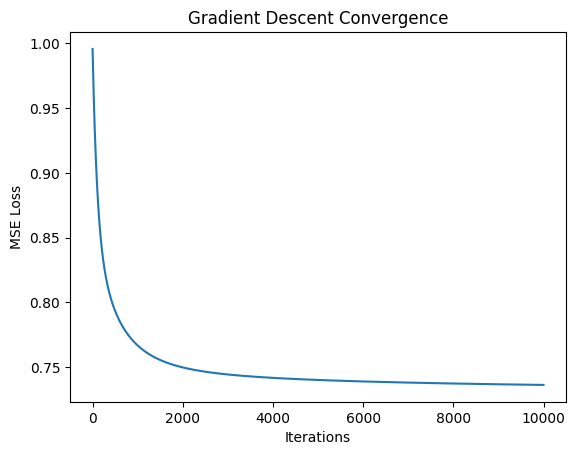

In [59]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Convergence")
plt.show()
